In [2]:
from huggingface_hub import login
login()

Resolving data files:   0%|          | 0/128 [00:00<?, ?it/s]


Sample #1
Caption: A room with physiotherapy treatment beds and exercise equipment


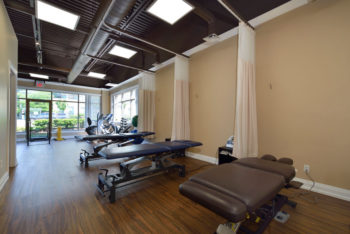


Sample #2
Caption: Crime scene investigation royalty free stock photography


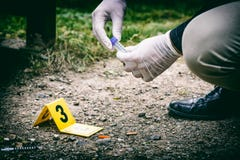


Sample #3
Caption: Jackson X Series Dinky Arch Top DKAF7 Multi-Scale 7-String Electric Guitar


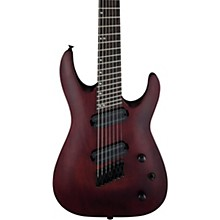


Sample #4
Caption: JF-Organic-Farm-pigs-trailer


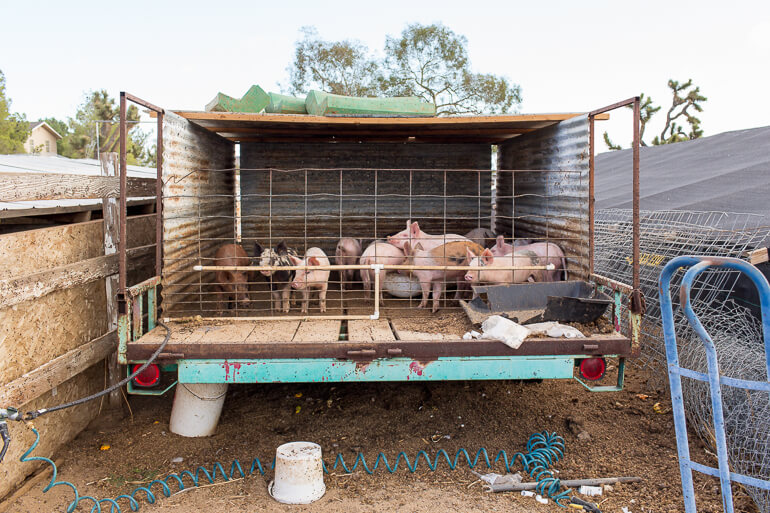


Sample #5
Caption: Dwight Howard might still be with the Magic when the season starts, which is bad for everyone. (US Presswire)


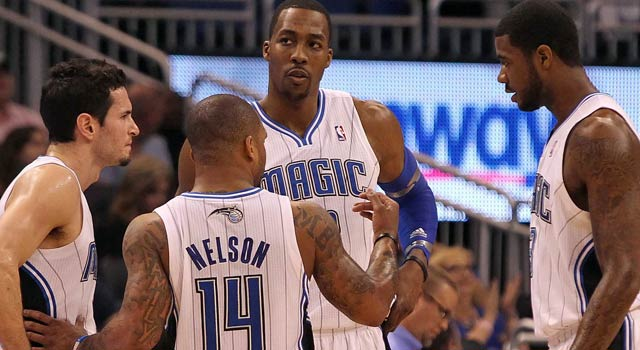


Sample #6
Caption: Passion Pit // Photo by Philip Cosores


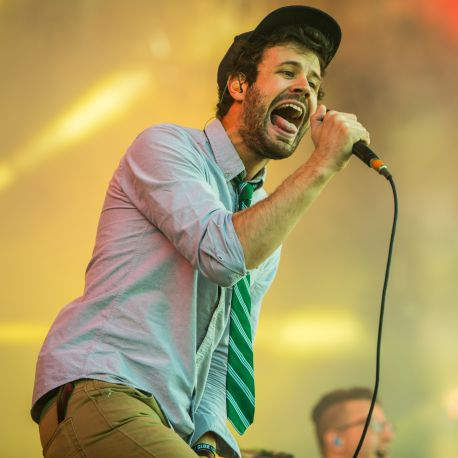


Sample #7
Caption: Biku Furniture and Homewares


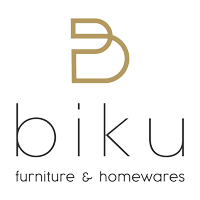


Sample #8
Caption: photograph of aurora with Sony Alpha mirrorless camera for astrophotography in Valdez, Alaska


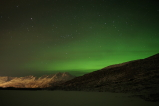


Sample #9
Caption: Laptop with monitor and tablet display template vector 06


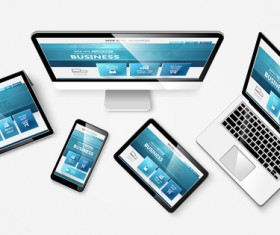


Sample #10
Caption: Musa Wall Light Musa Wandlamp by Note Design Studio Vibia


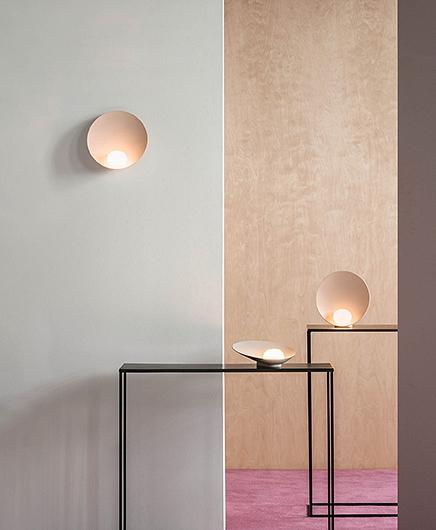

In [ ]:
from datasets import load_dataset
from PIL import Image
from io import BytesIO
import requests

# How many samples you wanta
n = 10  # Change this to any number you like

# Load the LAION dataset in streaming mode
ds = load_dataset("laion/aesthetics_v2_4.75", split="train", streaming=True)

# Get the first `n` samples
samples = []
for i, sample in enumerate(ds):
    if i >= n:
        break
    samples.append(sample)

# Download and display each image
for idx, sample in enumerate(samples):
    url = sample["URL"]
    text = sample["TEXT"]
    print(f"\nSample #{idx + 1}")
    print("Caption:", text)
    try:
        response = requests.get(url, timeout=5)
        img = Image.open(BytesIO(response.content))
        display(img)
    except Exception as e:
        print("Failed to load image:", e)

In [15]:
from datasets import load_dataset
from PIL import Image
from io import BytesIO
import requests
import os

from IPython.display import display, clear_output
import ipywidgets as widgets

# Create output directory if it doesn't exist
os.makedirs("images", exist_ok=True)

# Count already saved images for continuity
existing_images = [f for f in os.listdir("images") if f.endswith(".jpg")]
image_count = len(existing_images)

# Open log files in append mode (won’t overwrite)
caption_log = open("captions.txt", "a", encoding="utf-8")
path_log = open("paths.txt", "a", encoding="utf-8")

# Load dataset in streaming mode
ds = load_dataset("laion/aesthetics_v2_4.75", split="train", streaming=True)
sample_iter = iter(ds)

# Create widgets
next_button = widgets.Button(description="Next")
save_button = widgets.Button(description="Save")
counter_label = widgets.Label(value=f"Images saved: {image_count}")
output = widgets.Output()

# Store current sample data globally
current_sample = {"img": None, "caption": "", "url": ""}

def load_next_sample():
    global current_sample
    for sample in sample_iter:
        try:
            url = sample["URL"]
            caption = sample["TEXT"]
            response = requests.get(url, timeout=5)
            img = Image.open(BytesIO(response.content)).convert("RGB")
            current_sample = {"img": img, "caption": caption, "url": url}
            with output:
                clear_output(wait=True)
                print("Caption:", caption)
                display(img)
            break
        except Exception:
            continue  # Skip broken or invalid images

def save_current_sample(_):
    global image_count
    if current_sample["img"] is None:
        return
    filename = f"images/{image_count}.jpg"
    current_sample["img"].save(filename)
    caption_log.write(current_sample["caption"] + "\n")
    path_log.write(filename + "\n")
    caption_log.flush()
    path_log.flush()
    image_count += 1
    counter_label.value = f"Images saved: {image_count}"

def show_next(_):
    load_next_sample()

# Bind buttons
next_button.on_click(show_next)
save_button.on_click(save_current_sample)

# Display UI and load first sample
display(widgets.HBox([save_button, next_button, counter_label]), output)
load_next_sample()

Resolving data files:   0%|          | 0/128 [00:00<?, ?it/s]

Output()

In [ ]:
from PIL import Image
from IPython.display import display, clear_output
import ipywidgets as widgets
import os

# Load existing paths and captions
with open("paths.txt", "r", encoding="utf-8") as f:
    image_paths = [line.strip() for line in f.readlines()]

with open("captions.txt", "r", encoding="utf-8") as f:
    captions = [line.strip() for line in f.readlines()]

# Check consistency
assert len(image_paths) == len(captions), "Mismatch between image and caption files."

# State
current_index = 0
caption_input = widgets.Textarea(value=captions[current_index], layout=widgets.Layout(width="600px", height="100px"))
save_button = widgets.Button(description="Save")
next_button = widgets.Button(description="Next")
prev_button = widgets.Button(description="Previous")
status_label = widgets.Label(value=f"Image {current_index + 1} of {len(image_paths)}")
output = widgets.Output()

def show_image(index):
    with output:
        clear_output(wait=True)
        img = Image.open(image_paths[index])
        display(img)
        caption_input.value = captions[index]
        status_label.value = f"Image {index + 1} of {len(image_paths)}"

def save_caption(_):
    captions[current_index] = caption_input.value
    with open("captions.txt", "w", encoding="utf-8") as f:
        f.write("\n".join(captions) + "\n")
    status_label.value = f"Image {current_index + 1} of {len(image_paths)} (Saved!)"

def next_image(_):
    global current_index
    if current_index < len(image_paths) - 1:
        current_index += 1
        show_image(current_index)

def prev_image(_):
    global current_index
    if current_index > 0:
        current_index -= 1
        show_image(current_index)

save_button.on_click(save_caption)
next_button.on_click(next_image)
prev_button.on_click(prev_image)

# Display UI
display(widgets.VBox([
    output,
    caption_input,
    widgets.HBox([prev_button, save_button, next_button, status_label])
]))

# Show the first image
show_image(current_index)